In [2]:
from record import *
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import peak_widths

In [3]:
from os import listdir
from os.path import isfile, join
mypath='C:/Users/Lenovo/Desktop/Praktyka-2022/LSDWA-F/LSDWA-F_29-07-2019_12-13/'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
t=Record(mypath+files[0])

getting header


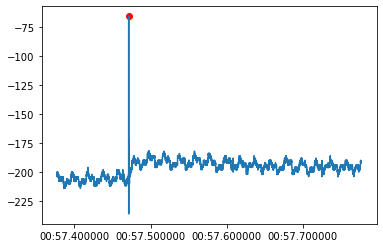

In [5]:
plt.plot(t.date[0:20000],t.chanel1[0:20000])

#peakind = signal.find_peaks_cwt(t.chanel1[0:20000], widths=0.5, min_length=1, noise_perc=1)
peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
if len(peakind)==0:
    peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    
for i in range(len(peakind)):
    plt.scatter(t.date[peakind[i]], t.chanel1[peakind[i]], c='r')
plt.show()

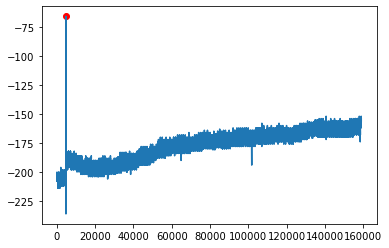

In [6]:
plt.plot(t.chanel1)
plt.scatter(peakind,t.chanel1[peakind], c='r')

In [7]:
print(str(t.date[peakind[0]].hour)+':'+str(t.date[peakind[0]].minute)+':'+str(t.date[peakind[0]].second)+'.'+str(t.date[peakind[0]].microsecond))

12:0:57.471249


In [8]:
dates=[]

for i in range(10):
    t=Record(mypath+files[i])
    peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
    if len(peakind)==0:
        peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    dates.append((str(t.date[peakind[0]].hour)+':'+str(t.date[peakind[0]].minute)+':'+str(t.date[peakind[0]].second)+'.'+str(t.date[peakind[0]].microsecond)))
dates    

getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header
getting header


['12:0:57.471249',
 '12:1:16.43346',
 '12:2:1.324920',
 '12:2:35.291262',
 '12:2:51.447470',
 '12:3:16.753765',
 '12:3:22.119343',
 '12:3:40.856057',
 '12:3:45.248092',
 '12:4:15.807022']

getting header


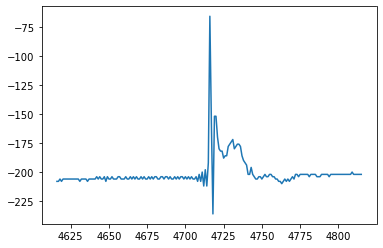

In [9]:
t=Record(mypath+files[0])
peakind, properties = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
if len(peakind)==0:
    peakind, properties = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    
if len(peakind)>=1:
    ind=np.arange(peakind[0]-100,peakind[0]+100,1)
    plt.plot(ind,t.chanel1[ind])
else:
    print('Trigger not found')
    


#### 

In [10]:
peak_widths(t.chanel1[0:20000], peakind)

(array([1.39164941]),
 array([-140.]),
 array([4715.41269841]),
 array([4716.80434783]))